# Testing Silhouette method for different image sizes

### Method for importing the image by the given image name

In [3]:
import cv2

def load_image(name):
    image = cv2.imread('../images/' + format(name) + '.jpg')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return image

### Method for resizing the image by the given height

In [4]:
import cv2

def resize_image(image, wanted_height) :
    height = image.shape[0]
    scale_percent = height / wanted_height
    width = int(image.shape[0] / scale_percent)
    dim = (width, wanted_height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    
    return image

### Method for image segmentation

In [5]:
import numpy as np
import cv2

def segmentation(image, k):
    pixel_values = image.reshape((-1, 1))

    pixel_values = np.float32(pixel_values)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    labels = labels.flatten()
    
    return pixel_values, labels

### Calculating Silhouette score

In [9]:
from sklearn.metrics import silhouette_score
import time

def silhouette_method(pixel_values, labels):
    start = time.time()
    s_score = silhouette_score(pixel_values, labels)
    end = time.time()
    s_time = end-start
    
    return s_time, s_score

### Calculating the Silhouette method for different sizes and plotting run times

[0.81429183, 0.8143097, 0.8143142]
[5.485455513000488, 83.85024309158325, 1452.3457307815552]


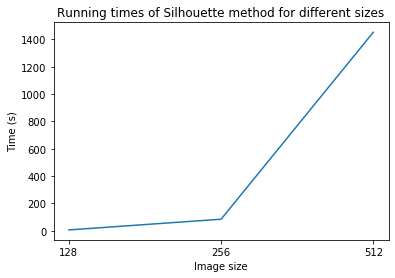

In [19]:
from matplotlib import pyplot as plt

size_values = [128, 256, 512]
image = load_image("5")
s_times = []
s_scores = []

for size in size_values:    
    image = resize_image(image, size)
    
    pixel_values, labels = segmentation(image, 2)
    
    s_time, s_score = silhouette_method(pixel_values, labels)
    
    s_times.append(s_time)
    s_scores.append(s_score)
    
print(s_scores)
print(s_times)

default_x_ticks = range(len(size_values))

plt.title('Running times of Silhouette method for different sizes')

plt.plot(s_times)

plt.xticks(default_x_ticks, size_values)

plt.xlabel("Image size")
plt.ylabel("Time (s)")

plt.show()

## Silhouette method with different sizes and cluster numbers

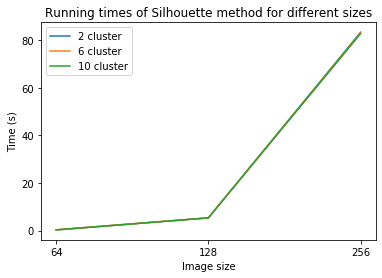

[[0.80798686, 2], [0.81429183, 2], [0.8173462, 2]]


In [18]:
from matplotlib import pyplot as plt

size_values = [64, 128, 256]
image = load_image("5")
s_closest = [[0, 2], [0, 2], [0, 2]]
all_times = []

for i in range(2, 11):
    s_times = []
    s_scores = []

    for j, size in enumerate(size_values):    
        resized_image = resize_image(image, size)

        pixel_values, labels = segmentation(resized_image, 2)

        s_time, s_score = silhouette_method(pixel_values, labels)

        s_times.append(s_time)
        s_scores.append(s_score)
        
        #get the best cluster number
        if((1-s_score) < (1-s_closest[j][0])):
            s_closest[j] = [s_score, i]

    all_times.append(s_times)
            
default_x_ticks = range(len(size_values))

plt.title('Running times of Silhouette method for different sizes')

plt.plot(all_times[0], label='2 cluster')
plt.plot(all_times[4], label='6 cluster')
plt.plot(all_times[8], label='10 cluster')

plt.xticks(default_x_ticks, size_values)

plt.xlabel("Image size")
plt.ylabel("Time (s)")

plt.legend()
plt.show()
    
print(s_closest)